In [0]:
import pandas as pd 
data = pd.read_csv("data.csv") 

In [145]:
data

,Timestamp,10th %,12th %,Sem 1 GPA,Sem 2 GPA,Sem 3 GPA,Sem 4 GPA,Sem 5 GPA,Sem 6 GPA,Sem 7 GPA,Gender,Part of some council or club in Sem 8?,Average number of hours spent studying (actually) daily before exams?,"How would you rate your study environment (separate room, noise, etc)? [5 being excellent and 1 being poor]",Average number of hours spent travelling to and from college daily?,Average number of hours spent for hobbies daily?,Coaching classes?,"Preparing for competitive exams (GATE, GRE, GMAT, etc)?",Attending placement interviews?
0,1/16/2020 16:46:34,96.00,92.80,9.77,9.63,9.42,9.14,9.00,9.30,9.25,Male,Yes,6.0,5,3.0,1.0,No,No,No
1,1/16/2020 16:46:47,87.20,79.54,7.77,7.81,8.48,8.48,8.27,8.35,8.08,Male,No,6.0,5,0.0,4.0,No,No,No
2,1/16/2020 16:48:33,91.80,87.38,7.31,7.18,8.70,7.62,7.18,8.04,8.46,Male,No,2.0,4,4.0,6.0,No,No,No
3,1/16/2020 16:48:52,94.40,89.50,8.46,9.31,8.80,8.50,8.20,8.02,8.75,Female,No,2.0,4,2.0,2.0,No,Yes,No
4,1/16/2020 16:49:26,92.20,85.60,9.27,9.73,9.22,9.29,8.45,8.70,8.88,Male,Yes,1.0,3,2.5,2.0,No,No,Yes
5,1/16/2020 16:50:01,94.40,88.15,9.58,9.35,9.17,9.10,8.86,9.30,9.10,Male,No,5.0,3,3.0,2.0,No,No,Yes
6,1/16/2020 16:51:37,93.80,85.23,8.77,9.58,9.17,8.81,8.23,8.52,8.79,Male,No,4.0,1,3.0,4.0,No,No,Yes
7,1/16/2020 16:58:48,88.00,83.34,9.08,8.88,9.09,8.71,7.64,7.65,7.67,Male,No,7.0,4,1.0,5.0,No,Yes,No
8,1/16/2020 17:01:03,93.20,89.80,8.62,9.19,8.26,8.19,7.91,8.91,8.54,Female,No,2.0,4,2.0,3.0,No,Yes,Yes
9,1/16/2020 17:03:55,93.60,89.69,9.38,9.27,8.83,9.14,8.18,8.57,9.13,Male,No,5.0,2,1.0,2.0,No,No,Yes


In [0]:
import numpy as np
data_np =data.values

# removing timestamp
data_np=data_np[:,1:]


In [0]:
for i in range(data_np.shape[0]):
  for j in range(data_np.shape[1]):
    data_np[i][j]=1 if data_np[i][j]=="Yes" else 0 if data_np[i][j]=="No" else data_np[i][j]
    data_np[i][j]=1 if data_np[i][j]=="Male" else 0 if data_np[i][j]=="Female" else data_np[i][j]



In [0]:
y= data_np[:,8]
x= np.delete(data_np,[8],1)
x=np.c_[  np.ones(len(x)) ,x ]   

train_x=x[:int(len(x)*0.8),:]
train_y=y[:int(len(x)*0.8)]
test_x=x[int(len(x)*0.8):,:]
test_y=y[int(len(x)*0.8):]


In [168]:

np.random.seed(0)
coef=np.random.rand(len(x[0]))
coef

array([0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ,
       0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152,
       0.79172504, 0.52889492, 0.56804456, 0.92559664, 0.07103606,
       0.0871293 , 0.0202184 , 0.83261985])

In [0]:
import numpy as np

data_np =data.values
test=data_np[-2:,1:]
data_np = data_np[:len(data_np)-2,1:]
y= data_np[:,6]
test_y=test[:,6]
# x=np.delete(data_np,[6],1)
x=data_np[:,:6]
test_x=test[:,:6]
x=np.c_[  np.ones(len(x)) ,x ]   
test_x=np.c_[  np.ones(len(test_x)) ,test_x ]   

np.random.seed(0)
coef=np.random.rand(len(x[0]))


In [0]:
def cost(x,coef,y):
  # print("cost",np.sum(np.square(np.matmul(x,coef)-y))/(2*len(x)))
  return np.sum(np.square(np.matmul(x,coef)-y))/(2*len(x))

In [0]:
def descent(x,coef,y,alpha,num_itr):
  prev_cost=0
  new_coef=np.empty(coef.shape)
  itr=0
  while(itr<num_itr):
    for i in range(len(coef)):
      # print(i)
      # print(x.shape)
      # print(coef.shape)
      # print(x)
      # print(y)
      # print(np.matmul(x,coef))

      # print(np.sum((np.matmul(x,coef) -y )*x[:,i]))
      new_coef[i]=coef[i]-((alpha/len(x))*np.sum((np.matmul(x,coef) -y )*x[:,i]))
    coef[:]=new_coef
    # print(new_coef)
    # print("reached")
    cur_cost=cost(x,coef,y)
    # print(cur_cost)
    itr+=1

  return cur_cost


In [0]:
def mse(actual,pred):
  diff=actual-pred
  return np.mean(diff*diff)

In [169]:
print("Final cost:",descent(train_x,coef,train_y,alpha=0.0001,num_itr=1000))
print("Final weights:",coef)


Final cost: 1.1070777518868897
Final weights: [ 0.54015234 -0.04988937 -0.22854027  0.39872975  0.29429398  0.53006214
  0.31398049  0.76480373  0.83901834  0.35824943  0.77426364  0.27887775
  0.52082445  0.85836935  0.07035285  0.08590793  0.01615574  0.81177686]


In [165]:
pred=[]
for i in range(len(test_x)):
  pred.append(np.sum(test_x[i]*coef))
  print("actual value:",test_y[i],"prdected value:",pred[i])

pred=np.array(pred)

actual value: 8.79 prdected value: 7.116955010065671
actual value: 8.88 prdected value: 9.609281041304651
actual value: 8.38 prdected value: 6.740581434567958
actual value: 8.25 prdected value: 8.601365585153108
actual value: 8.81 prdected value: 10.206283550696636
actual value: 8.29 prdected value: 11.353741986508444
actual value: 9.21 prdected value: 7.503285609665762
actual value: 8.75 prdected value: 6.934192060010814


In [166]:
print("Mean sqaured error",mse(test_y,pred))

Mean sqaured error 2.961029572700807


In [0]:
feature_importance=[]
for i in range(len(coef)):
  permute_x=test_x.copy()
  np.random.shuffle(permute_x[:,i])
  pred=np.matmul(permute_x,coef)
  feature_importance.append(mse(test_y,pred))


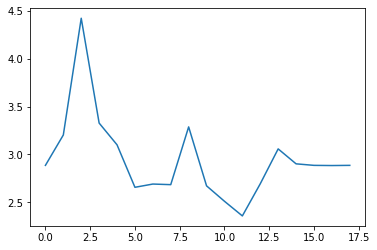

In [211]:
plt.plot(feature_importance)


In [218]:
important_features=[]
for i,importance in enumerate(feature_importance): 
  if importance>=3:
    important_features.append(i)
important_features

[1, 2, 3, 4, 8, 13]

In [222]:
important_features=[0]+important_features

# creating new test and train set with only important features
train_x_new=train_x[:,important_features]
test_x_new=test_x[:,important_features]
test_x_new

array([[1.0, 94.4, 84.0, 8.64, 7.79, 8.43, 2.0],
       [1.0, 89.4, 83.85, 8.77, 8.08, 8.83, 2.0],
       [1.0, 91.33, 82.46, 8.23, 8.5, 8.35, 0.5],
       [1.0, 90.0, 82.15, 8.15, 8.46, 8.7, 2.0],
       [1.0, 97.0, 93.0, 9.7, 9.85, 9.0, 3.0],
       [1.0, 95.0, 76.0, 7.96, 7.73, 8.17, 4.0],
       [1.0, 94.6, 86.4, 8.62, 8.12, 8.96, 1.0],
       [1.0, 88.0, 84.0, 8.64, 8.42, 8.17, 0.5]], dtype=object)

In [250]:
np.random.seed(0)
coef=np.random.rand(len(train_x_new[0]))
print("Final cost:",descent(train_x_new,coef,train_y,alpha=0.0001,num_itr=1000))
print("Final weights:",coef)

Final cost: 0.14253137369759997
Final weights: [ 0.54123289  0.01594496 -0.07195398  0.45980783  0.33870175  0.57963928
  0.39756565]


In [251]:
pred=[]
for i in range(len(test_x_new)):
  pred.append(np.sum(test_x_new[i]*coef))
  print("actual value:",test_y[i],"prdected value:",pred[i])

pred=np.array(pred)

actual value: 8.79 prdected value: 8.295019681325584
actual value: 8.88 prdected value: 8.615942197757764
actual value: 8.38 prdected value: 7.76611519706141
actual value: 8.25 prdected value: 8.51610365185465
actual value: 8.81 prdected value: 9.601972699727744
actual value: 8.29 prdected value: 9.19165216857385
actual value: 9.21 prdected value: 8.137737708470276
actual value: 8.75 prdected value: 7.659299336501059


In [252]:
print("Mean sqaured error",mse(test_y,pred))

Mean sqaured error 0.567746186626368
